# Boston house price prediction

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s boston dataset.

In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price).
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [59]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
import scipy.stats as stats

In [60]:
# Importing the Boston Housing dataset

boston = pd.read_csv(r'D:\CMadhuri\Real estate project\Real estate raw data.csv')

boston.head()

boston.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [61]:
# Initializing the dataframe
data = pd.DataFrame(boston)

In [62]:
# See head of the dataset

data=data.drop(['No'], axis = 1)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


array([[<AxesSubplot:xlabel='X1 transaction date', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='X2 house age', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='X4 number of convenience stores', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='X5 latitude', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='X6 longitude', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='Y house price of unit area', ylabel='X1 transaction date'>],
       [<AxesSubplot:xlabel='X1 transaction date', ylabel='X2 house age'>,
        <AxesSubplot:xlabel='X2 house age', ylabel='X2 house age'>,
        <AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='X2 house age'>,
        <AxesSubplot:xlabel='X4 number of convenience stores', ylabel='X2 house age'>,
        <AxesSubplot:xlabel='X5 latitude', ylabel='X2 house age'>,
        <AxesSubpl

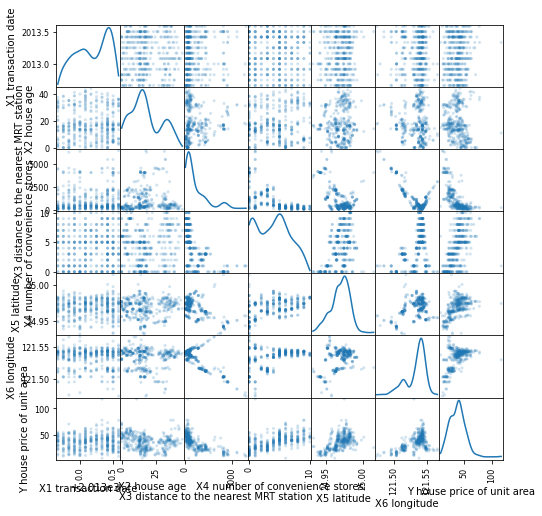

In [63]:
#Adding the feature names to the dataframe
scatter_matrix(data, alpha=0.2, figsize=(8, 8), diagonal='kde')

Each record in the database describes a Boston suburb or town.

In [64]:
correlation_features=data.corr()   #Obtaining the correlation between the features
correlation_features

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [65]:
#Adding target variable to dataframe
#data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [66]:
#Check the shape of dataframe
data.shape

(414, 7)

In [67]:
data.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [68]:
data.dtypes

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [69]:
# Identifying the unique number of values in the dataset
#data.nunique()

In [70]:
# Check for missing values
#data.isnull().sum()

In [71]:
# See rows with missing values
#data[data.isnull().any(axis=1)]

In [72]:
# Viewing the data statistics
#data.describe()

In [84]:
from sklearn.preprocessing import LabelEncoder
data['X1 transaction date'] = LabelEncoder().fit_transform(data['X1 transaction date'])
data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,3,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,3,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,11,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,10,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,2,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732
...,...,...,...,...,...,...,...
409,4,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,-1.661525
410,0,-1.064493,-0.788071,1.667503,0.427579,0.635341,0.884457
411,7,0.095568,-0.549678,0.987694,0.822893,0.423972,0.192774
412,4,-0.844784,-0.776684,0.307885,-0.184755,0.476814,1.068415


In [74]:
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler   
#data[[ 'X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area']] = StandardScaler().fit_transform(data[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area']])
# standardizing the fetaure values
#data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,3,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,3,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,11,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,10,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,2,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732
...,...,...,...,...,...,...,...
409,4,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,-1.661525
410,0,-1.064493,-0.788071,1.667503,0.427579,0.635341,0.884457
411,7,0.095568,-0.549678,0.987694,0.822893,0.423972,0.192774
412,4,-0.844784,-0.776684,0.307885,-0.184755,0.476814,1.068415


In [85]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(7, 7)

<AxesSubplot:>

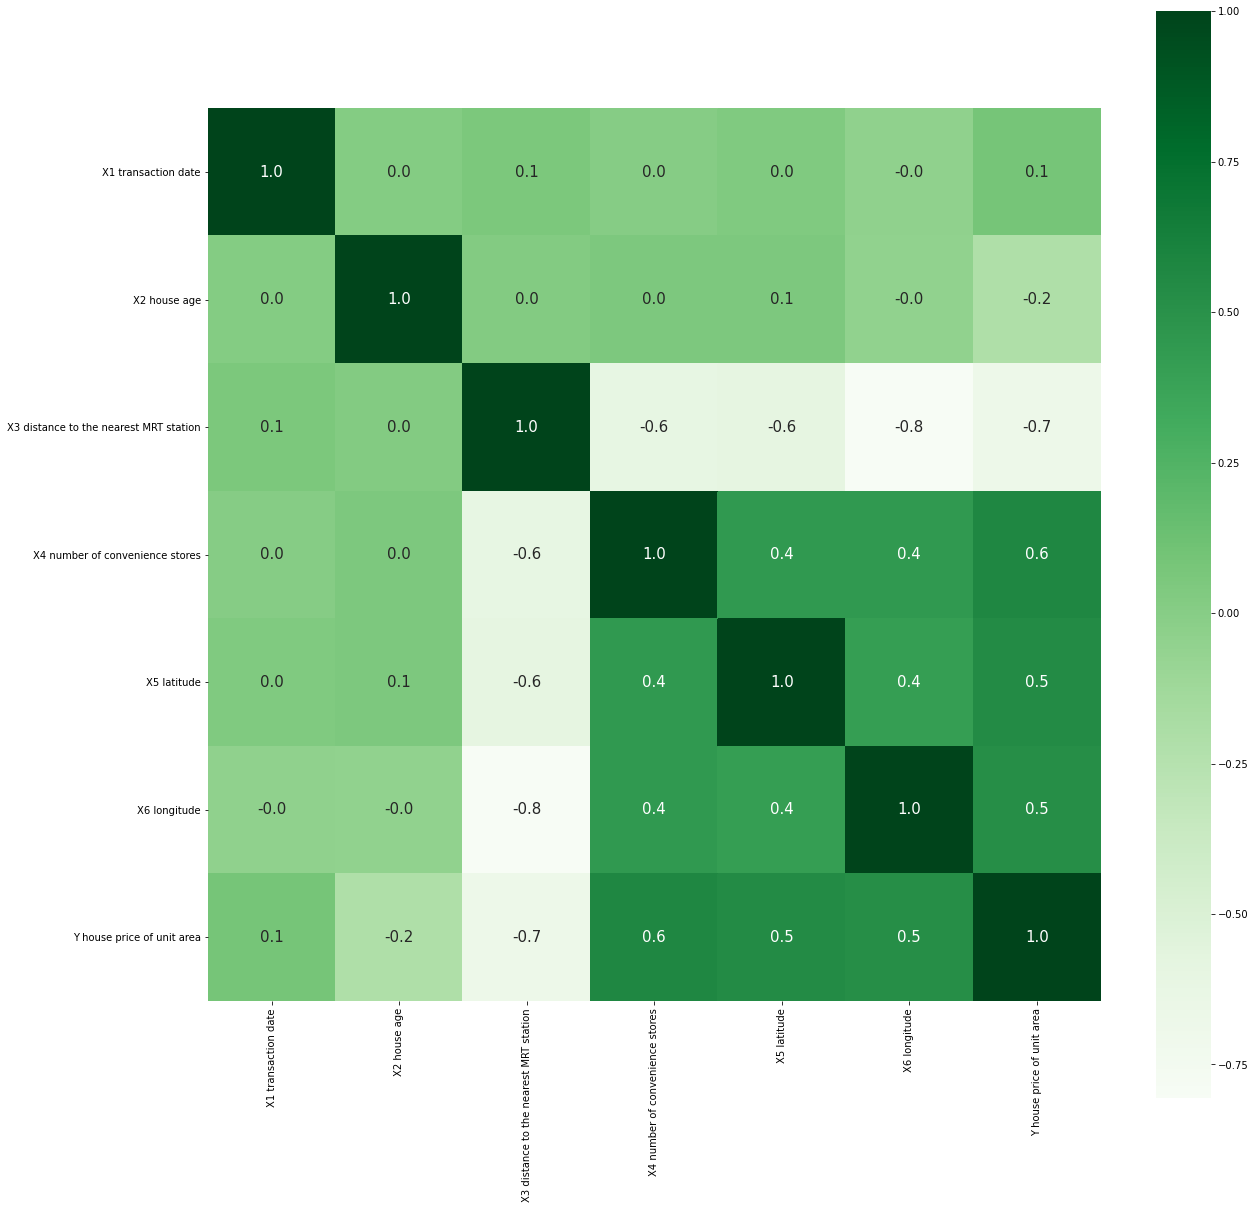

In [86]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [87]:
# Spliting target variable and independent variables
X = data.drop(['Y house price of unit area'], axis = 1)
y = data['Y house price of unit area']

In [88]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Linear regression

#### Training the model

In [89]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [90]:
# Value of y intercept
lm.intercept_

-0.1713249878547069

In [91]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,X1 transaction date,0.0281344
1,X2 house age,-0.234216
2,X3 distance to the nearest MRT station,-0.418684
3,X4 number of convenience stores,0.182877
4,X5 latitude,0.229688
5,X6 longitude,-0.04185


#### Model Evaluation

In [92]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [93]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5783288097664392
Adjusted R^2: 0.5693570823146613
MAE: 0.42558184224581364
MSE: 0.3992935490480226
RMSE: 0.6318967867049354


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 






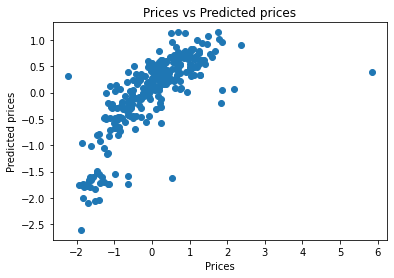

In [37]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

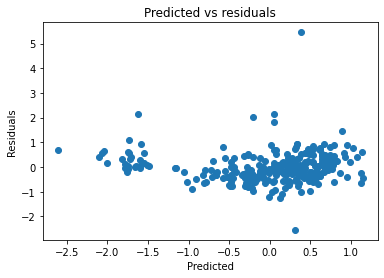

In [38]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


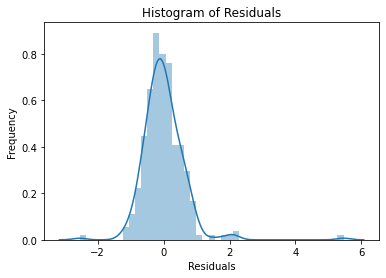

In [39]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

#### For test data

In [40]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [41]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.574654240901791
Adjusted R^2: 0.5530264904391702
MAE: 0.5112454734916172
MSE: 0.4764459422315388
RMSE: 0.6902506372554384


In [49]:
#data['Y house price of unit area']= np.log(data['Y house price of unit area'])
#sns.distplot(data['Y house price of unit area'], fit=norm)
#fig = plt.figure()

NameError: name 'norm' is not defined

In [42]:
# Logtransform y variable
#y = data['Y house price of unit area']
#y = np.log1p(y)
#y

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     -0.005918
1      0.270414
2      0.522229
3      0.805429
4      0.319713
         ...   
409         NaN
410    0.633640
411    0.176282
412    0.726783
413    1.067213
Name: Y house price of unit area, Length: 414, dtype: float64

In [ ]:
#def add_log_transform(df, variable, indexplus = 1):
 #       print df[variable].isnull()
  #      log_variable = (np.log(df[variable]))
#def main():
 #   variables_needs_tranform = ['']
#util.add_log_transform(df, variables_needs_tranform, indexplus = 1)

#if __name__ == "__main__":
 #       main()

Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

# Random Forest Regressor 

#### Train the model

In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

### Model Evaluation

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# XGBoost Regressor

#### Training the model

In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

n_estimators (int) – Number of boosted trees to fit.

gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.

subsample (float) – Subsample ratio of the training instance.

colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

nthread (int) – Number of parallel threads used to run xgboost. (Deprecated, please use n_jobs)

scale_pos_weight (float) – Balancing of positive and negative weights.


### Model Evaluation

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [ ]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# SVM Regressor

In [ ]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the model

In [ ]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [ ]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

#### Model Evaluation

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Evaluation and comparision of all the models

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

## Hence XGBoost Regression works the best for this dataset.****

### Please upvote if you found this kernel useful! :) <br>
### Feedback is greatly appreciated!